IMPORTING LIBRARIES AND LOADING DATA

In [ ]:
pip install tweet-preprocessor

In [ ]:
import re 
import nltk 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
import sklearn
import preprocessor as p
import sklearn
import tensorflow as tf
pd.set_option("display.max_colwidth", 200) #to be seen
warnings.filterwarnings("ignore", category=DeprecationWarning) #ignore depricated versions warnings

%matplotlib inline 


train  = pd.read_csv('train.csv',encoding='latin-1') 
test = pd.read_csv('test.csv',encoding='latin-1')

In [ ]:
train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

CLEANING DATA

In [ ]:
dataClean = train.append(test, ignore_index=True) 

dataClean.drop('UserName', axis=1, inplace=True)
dataClean.drop('ScreenName', axis=1, inplace=True)
dataClean.drop('Location', axis=1, inplace=True)
dataClean.drop('TweetAt', axis=1, inplace=True)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


dataClean['OriginalTweet'] = dataClean['OriginalTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #remove small words
dataClean['OriginalTweet'] = dataClean['OriginalTweet'].apply(p.clean)

dataClean.head(15)


,OriginalTweet,Sentiment
0,,Neutral
1,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist online shopping accounts poss adequate supplies regular meds ov...,Positive
2,"Coronavirus Australia: Woolworths give elderly, disabled dedicated shopping hours amid COVID-19 outbreak",Positive
3,"food stock only which empty... PLEASE, don't panic, THERE WILL ENOUGH FOOD EVERYONE take more than need. Stay calm, stay safe.",Positive
4,"ready supermarket during outbreak. because paranoid, because food stock litteraly empty. serious thing, please, don't panic. causes shortage...",Extremely Negative
5,"news regions first confirmed COVID-19 case came Sullivan County last week, people flocked area stores purchase cleaning supplies, hand sanitizer, food, toilet paper other goods, reports",Positive
6,"Cashier grocery store sharing insights prove credibility commented ""I'm Civics class know what talking about"".",Positive
7,supermarket today. Didn't toilet paper.,Neutral
8,"COVID-19 retail store classroom Atlanta will open walk-in business classes next weeks, beginning Monday, March will continue process online phone orders normal! Thank your understanding!",Positive
9,"corona prevention,we should stop things with cash should online payment methods because corona spread through notes. Also should prefer online shopping from home. It's time fight against COVID",Negative


In [ ]:
def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https:\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'
  text = re.sub('[^a-zA-Z#]',' ',text)
  return text

In [ ]:
tokenized_tweet = dataClean['OriginalTweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()
from nltk.stem.porter import * 
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
dataClean['OriginalTweet'] = tokenized_tweet
dataClean.head(10)

,OriginalTweet,Sentiment
0,,Neutral
1,advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist onlin shop account poss adequ suppli regular med over order,Positive
2,"coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak",Positive
3,"food stock onli which empty... please, don't panic, there will enough food everyon take more than need. stay calm, stay safe.",Positive
4,"readi supermarket dure outbreak. becaus paranoid, becaus food stock litterali empty. seriou thing, please, don't panic. caus shortage...",Extremely Negative
5,"news region first confirm covid-19 case came sullivan counti last week, peopl flock area store purchas clean supplies, hand sanitizer, food, toilet paper other goods, report",Positive
6,"cashier groceri store share insight prove credibl comment ""i'm civic class know what talk about"".",Positive
7,supermarket today. didn't toilet paper.,Neutral
8,"covid-19 retail store classroom atlanta will open walk-in busi class next weeks, begin monday, march will continu process onlin phone order normal! thank your understanding!",Positive
9,"corona prevention,w should stop thing with cash should onlin payment method becaus corona spread through notes. also should prefer onlin shop from home. it' time fight against covid",Negative


SEPARATING TEST AND TRAIN DATA

In [ ]:
train=dataClean.iloc[:41157,:]
test=dataClean.iloc[41157:,:]

OUTPUT ENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohcoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
y1 = ohcoder.fit_transform(train["Sentiment"].values.reshape(-1, 1))
y1

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['OriginalTweet'], y1, test_size=0.25, random_state=35)



train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
BUFFER_SIZE = 8000
BATCH_SIZE = 50

In [ ]:
train= train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test= test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'To all members of the public We have a great supply chain and with the increasing demand for food in light of the ongoing issues of Covid 19 we have opened our services to the public and we are now offering a CLICK amp COLLECT service from our site at Embleton Cockermouth'
 b'On the eve of the Karnataka government asked people to stock up food items for a week'
 b"#BradPaisley's free grocery store is delivering essentials to the elderly amid the #coronavirus crisis!\r\r\n\r\r\nhttps://t.co/G3eKI2jKSx"]

labels:  [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


TEXT ENCODER

In [ ]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())

encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  3,  33, 800,   5,   2, 221,  24,  23,   6, 245, 137, 280,   4,
         22,   2, 672,  73,  10,  19,   7, 858,   5,   2,   1, 750,   5,
         53,  45,  24,  23,   1,  39, 269,   3,   2, 221,   4,  24,  12,
         58, 493,   6, 908,  32,   1, 262,  31,  39,   1,  18,   1,   1],
       [ 13,   2,   1,   5,   2,   1, 187, 636,  30,   3,  85,  43,  19,
        188,  10,   6, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 208,  25,  21,  11,   1, 402,   3,   2, 332, 158,   2,   8,
         94,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

CREATE LSTM

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5,activation=tf.nn.softmax)
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

TRAIN MODEL

In [ ]:
history = model.fit(train, epochs=25,
                    validation_data=test, 
                    validation_steps=50)


Epoch 1/25
618/618 [==============================] - 86s 139ms/step - loss: 1.4917 - accuracy: 0.3280 - val_loss: 1.4365 - val_accuracy: 0.3632
Epoch 2/25
618/618 [==============================] - 83s 134ms/step - loss: 1.3493 - accuracy: 0.4200 - val_loss: 1.2967 - val_accuracy: 0.4756
Epoch 3/25
618/618 [==============================] - 84s 136ms/step - loss: 1.1885 - accuracy: 0.5135 - val_loss: 1.1564 - val_accuracy: 0.5388
Epoch 4/25
618/618 [==============================] - 84s 136ms/step - loss: 1.0888 - accuracy: 0.5646 - val_loss: 1.1202 - val_accuracy: 0.5584
Epoch 5/25
618/618 [==============================] - 84s 135ms/step - loss: 1.0469 - accuracy: 0.5870 - val_loss: 1.0975 - val_accuracy: 0.5716
Epoch 6/25
618/618 [==============================] - 84s 136ms/step - loss: 1.0263 - accuracy: 0.6001 - val_loss: 1.0812 - val_accuracy: 0.5812
Epoch 7/25
618/618 [==============================] - 83s 135ms/step - loss: 1.0140 - accuracy: 0.6033 - val_loss: 1.0836 - val_ac

In [ ]:
model.save('finetuned_rnn.h5')

NotImplementedError: ignored

In [ ]:
from tensorflow.keras.models import load_model
fine_rnn = load_model('finetuned_rnn.h5')

TEST MODEL

In [ ]:
loss, acc = model.evaluate(test)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

206/206 [==============================] - 4s 21ms/step - loss: 1.0346 - accuracy: 0.5920
Test Loss: 1.0345537662506104
Test Accuracy: 0.5920311212539673


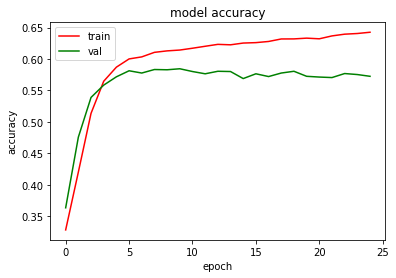

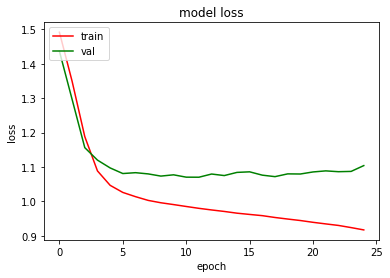

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test=dataClean.iloc[41157:,:]
test

,OriginalTweet,Sentiment
41157,"trending: yorker encount empti supermarket shelv (pictured, wegman brooklyn), sold-out onlin grocer (foodkick, maxdelivery) -fear shopper stock",NaN
41158,"when couldn't find hand sanit fred meyer, turn $114.97 pack purell??!!check concern drive prices.",NaN
41159,find protect yourself love one from,NaN
41160,buy hit citi anxiou shopper stock food&amp;med suppli after worker becom confirm patient stage event?,NaN
41161,week everyon buy babi milk powder next everyon buy toilet paper.,NaN
...,...,...
44950,meanwhil supermarket israel peopl danc sing togeth stay positive.,NaN
44951,panic non-perish items? echo need food donations. also look volunt pack boxes. volunt will screen sure they don't have covid-19.,NaN
44952,asst prof econom talk about recent research coronavirus' impact economy. watch here (start :33):,NaN
44953,need someth instead biar rakyat assum 'lockdown' even worst. harini semua supermarket crowd like hell. lagi mudah viru tersebar,NaN


In [ ]:
output=model.predict(test["OriginalTweet"])
output=np.argmax(output,axis=1)
output

array([2, 4, 1, ..., 3, 4, 3])

In [ ]:
values={0:'Extremely Negative',1:'Extremely Positive',2:'Negative',3:'Neutral',4:'Positive'}
x=[]
for i in range(len(output)):
    x.append([i+1,values[output[i]]])

df = pd.DataFrame(x, columns = ['UserName', 'Sentiment'])


In [ ]:
df.to_csv("/content/183-fine_tuned_rnn.csv")